In [1]:
import math
import matplotlib.pyplot as plt
import random
# Data points
points = [(1, 2), (2, 6), (12, 10), (3, 10), (3, 8), (14, 9), (4, 6), 
          (15, 10), (6, 9), (6, 11), (6, 5), (7, 5), (15, 4), (7, 2), 
          (15, 18), (4, 7)]

# Euclidean distance function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [2]:
# Compute the centroid of a cluster
def compute_centroid(cluster):
    x_sum, y_sum = 0, 0
    for point in cluster:
        x_sum += point[0]
        y_sum += point[1]
    return (x_sum / len(cluster), y_sum / len(cluster))

In [3]:
# K-means algorithm from scratch
def kmeans(points, initial_centroids, k):
    centroids = initial_centroids
    clusters = [[] for _ in range(k)]
    count1=0
    while True:
        # Assign points to the nearest centroid
        count1+=1
        new_clusters = [[] for _ in range(k)]
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_idx = distances.index(min(distances))
            new_clusters[closest_idx].append(point)
        print(distances)
        print(new_clusters)
        # Compute new centroids
        new_centroids = [compute_centroid(cluster) for cluster in new_clusters]
        
        # If centroids do not change, break the loop
        if new_centroids == centroids:
            break
        
        centroids = new_centroids
        clusters = new_clusters
    print(count1)
    return clusters, centroids

In [4]:
# Plotting function
def plot_clusters(clusters, centroids):
    colors = ['r', 'g', 'b']
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            plt.scatter(point[0], point[1], color=colors[idx])
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], color='b', marker='x', s=50)
    plt.show()

[8.54400374531753, 2.8284271247461903]
[[(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)], [(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (7, 2), (4, 7)]]
[10.690182411914213, 0.710022697809696]
[[(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)], [(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (7, 2), (4, 7)]]
2
[1.4142135623730951, 11.40175425099138, 11.40175425099138]
[[(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (7, 2), (4, 7)], [(12, 10), (14, 9), (15, 10), (15, 18)], [(15, 4)]]
[0.710022697809696, 11.070794912742265, 11.40175425099138]
[[(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (7, 2), (4, 7)], [(12, 10), (14, 9), (15, 10), (15, 18)], [(15, 4)]]
2
Clusters for k=2 [[(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)], [(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (7, 2), (4, 7)]]
Clusters for k=3 [[(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6,

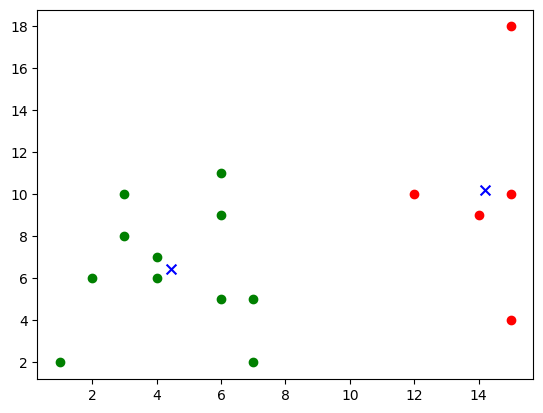

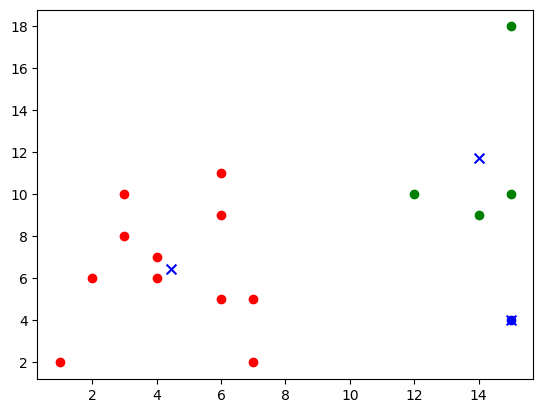

In [5]:
# Initial centroids for k=2 and k=3
centroids_k2 = [random.choice(points) for _ in range(2)]  # For k=2
centroids_k3 = [random.choice(points) for _ in range(3)]  # For k=3
# Run K-means
clusters_k2, centroids_k2_final = kmeans(points, centroids_k2, 2)
clusters_k3, centroids_k3_final = kmeans(points, centroids_k3, 3)

print("Clusters for k=2", clusters_k2)
print("Clusters for k=3",clusters_k3)

# Plot clusters
plot_clusters(clusters_k2, centroids_k2_final)
plot_clusters(clusters_k3, centroids_k3_final)


In [6]:
# Within-cluster distance
def within_cluster_distance(clusters, centroids):
    total_distance = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            total_distance += (point[0] - centroids[i][0]) ** 2 + (point[1] - centroids[i][1]) ** 2
    return total_distance

# Calculate within-cluster distances for k=2 and k=3
wcd_k2 = within_cluster_distance(clusters_k2, centroids_k2_final)
wcd_k3 = within_cluster_distance(clusters_k3, centroids_k3_final)

print(f"Within-cluster distance for k=2: {wcd_k2}")
print(f"Within-cluster distance for k=3: {wcd_k3}")

Within-cluster distance for k=2: 237.0545454545454
Within-cluster distance for k=3: 188.20454545454544
